# Изучение закономерностей, определяющих успешность игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import ceil as math

pd.options.display.max_columns = None

In [2]:
games = pd.read_csv('games.csv')
games.columns = games.columns.str.lower()

display(games.head(15))
display(games.describe())
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После изучения файла видны следующие проблемы:

1. Есть пропуски в столбцах: name, year_of_release, critic_score, user_score, rating.
2. Неправильные типы данных у столбцов: year_of_release, critic_score, user_score.
3. Для удобства работы следует привести к нижнему регистру названия столбцов и значения некоторых столбцов.

## Подготовка данных

In [3]:
games.duplicated().sum()
games['name'].isnull().sum()
games.insert(0, 'id', games.index)

games.dropna(subset=['name'], inplace = True)

games.platform = games.platform.str.lower()

games['critic_score'] = games['critic_score'].fillna(101)
games['critic_score'] = games['critic_score'].astype('int')

games.loc[games['user_score'] == 'tbd', 'user_score'] = '11'
games['user_score'] = games['user_score'].fillna(11)
games['user_score'] = games['user_score'].astype('float')

games['prod_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Цикл с заменой отсут. значения для игр, которые есть на разных платформах, берём максимальный год
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()
    
games.dropna(subset=['year_of_release'], inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')    

display(games.head(15))
display(games.describe())
print(games.info())

<ipython-input-3-e4d8f542fc94>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()


,id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,prod_sum
0,0,Wii Sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,101,11.0,NaN,40.24
2,2,Mario Kart Wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,101,11.0,NaN,31.38
5,5,Tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,101,11.0,NaN,30.26
6,6,New Super Mario Bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,7,Wii Play,wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,8,New Super Mario Bros. Wii,wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,9,Duck Hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,101,11.0,NaN,28.31


,id,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,prod_sum
count,16567.00000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000
mean,8348.32951,2006.491881,0.263975,0.145814,0.078020,0.047567,85.398805,9.236416,0.535376
std,4826.22625,5.862239,0.816474,0.505364,0.310068,0.187476,18.720751,2.178395,1.554281
min,0.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,4163.50000,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,7.600000,0.060000
50%,8347.00000,2007.000000,0.080000,0.020000,0.000000,0.010000,101.000000,11.000000,0.170000
75%,12526.50000,2010.000000,0.240000,0.110000,0.040000,0.030000,101.000000,11.000000,0.470000
max,16714.00000,2016.000000,41.360000,28.960000,10.220000,10.570000,101.000000,11.000000,82.540000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16567 non-null  int64  
 1   name             16567 non-null  object 
 2   platform         16567 non-null  object 
 3   year_of_release  16567 non-null  int32  
 4   genre            16567 non-null  object 
 5   na_sales         16567 non-null  float64
 6   eu_sales         16567 non-null  float64
 7   jp_sales         16567 non-null  float64
 8   other_sales      16567 non-null  float64
 9   critic_score     16567 non-null  int32  
 10  user_score       16567 non-null  float64
 11  rating           9868 non-null   object 
 12  prod_sum         16567 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(4)
memory usage: 1.6+ MB
None


Подготовим данные:

- Удаление строк, где отсутствовало название игры

- Приведение к нижнему регистру названия столбцов и значений столбца 'platform'

- Заполнение отсутствующих значений в описанных выше столбцах

- tbd значит подлежит уточнению, заменю на стороннее число подобные значения

- Смена типов данных

- Подсчёт суммарных продаж во всех регионах - данная информация хранится в столбце 'prod_sum'

## Анализ данных

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


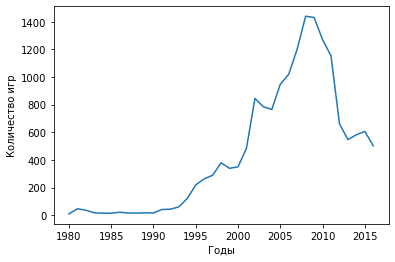

In [4]:
col_gam_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(col_gam_year)

gameskk = games.pivot_table(index = 'year_of_release', values = 'id', aggfunc = 'count')
gameskk.plot(y = 'id', legend = False)
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

В 21 веке стали выпускать много игр, этот период нам будет наиболее интересен.

Скачок произошел с 2001-2002 и длился до пика 2008-2009 года, после чего количество выпускаемых игр пошло на спад, возможно это может быть связано с разивтием мобильной индустрии, увеличением времени и средств на разработку игр.

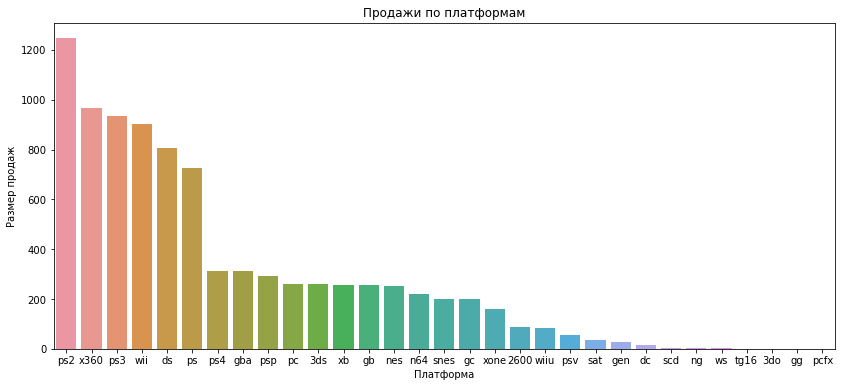

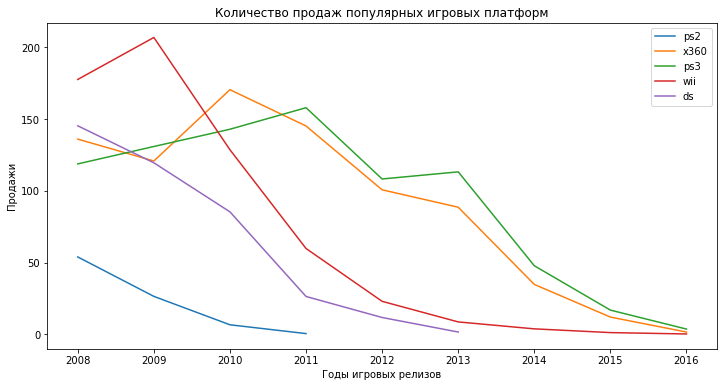

In [5]:
pl_gam = games.pivot_table(index='platform', values='prod_sum', aggfunc='sum')
pl_gam = pl_gam.sort_values(by='prod_sum', ascending = False)

plt.figure(figsize=(14,6))
sns.barplot(x=pl_gam.index,y=pl_gam['prod_sum'])
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Размер продаж')
plt.show()

t5 = games.pivot_table(index='platform', values='prod_sum', aggfunc='sum').sort_values(by='prod_sum', ascending=False).head(5)
t5 = t5.reset_index().rename_axis(None, axis=1)

plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

def year_pl(name, data):
    tt = games[(games['platform'] == name) & (data['year_of_release'] > 2007)]
    ob = tt.pivot_table(index='year_of_release', values='prod_sum', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return ob

for i in list(t5['platform']):
    sns.lineplot(data=year_pl(i,games)['prod_sum'], label=i)
    plt.legend()

Топ-5 продаж составляют: ps2, x360, ps3, wii и ds.

Жизненный цикл платформ из топ-5 в среднем составляет 10 лет.

In [6]:
games5 = games.loc[games['year_of_release'] > 2012]
games5

,id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,prod_sum
16,16,Grand Theft Auto V,ps3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,23,Grand Theft Auto V,x360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,101,11.0,NaN,14.63
33,33,Pokemon X/Pokemon Y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,101,11.0,NaN,14.60
42,42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,16703,Strawberry Nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,101,11.0,NaN,0.01
16707,16707,Aiyoku no Eustia,psv,2014,Misc,0.00,0.00,0.01,0.00,101,11.0,NaN,0.01
16710,16710,Samurai Warriors: Sanada Maru,ps3,2016,Action,0.00,0.00,0.01,0.00,101,11.0,NaN,0.01
16712,16712,Haitaka no Psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,101,11.0,NaN,0.01


В дальнейшем в работе будем рассматривать данные от 2013 года.

In [7]:
var1 = games5.pivot_table(index=['platform','year_of_release'], values='prod_sum', aggfunc='sum')
var1 = var1.sort_values(by='platform', ascending = False)
display(var1)

prod_sum
platform year_of_release          
xone     2016                26.15
         2015                60.14
         2014                54.07
         2013                18.96
x360     2016                 1.52
         2015                11.96
         2014                34.74
         2013                88.58
wiiu     2014                22.03
         2013                21.65
         2016                 4.60
         2015                16.35
wii      2016                 0.18
         2015                 1.14
         2014                 3.75
         2013                 8.59
psv      2014                11.90
         2016                 4.25
         2015                 6.25
         2013                10.59
psp      2015                 0.12
         2014                 0.24
         2013                 3.38
ps4      2016                69.25
         2015               118.90
         2014               100.00
         2013                25.99
ps3      2014                47.76
         2013               113.25
         2016                 3.60
         2015                16.82
pc       2016                 5.25
         2015                 8.52
         2014                13.63
         2013                12.66
ds       2013                 1.54
3ds      2015                27.78
         2014                43.76
         2016                15.14
         2013                56.57

Text(0, 0.5, 'Продажи, всего')

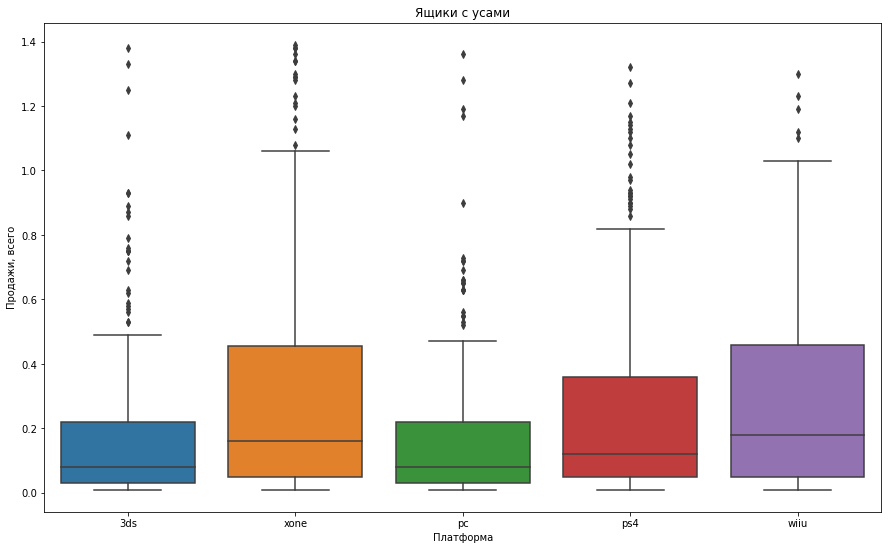

In [8]:
lt5 = ['xone','wiiu','ps4','pc','3ds']
t5sp = games5[games5['platform'].isin(['xone','wiiu','ps4','pc','3ds'])]
t5sp = t5sp[t5sp['prod_sum']<1.4]

plt.figure(figsize=(15,9))
sns.boxplot(data=t5sp, x='platform', y='prod_sum')
plt.title('Ящики с усами')
plt.xlabel('Платформа')
plt.ylabel('Продажи, всего')

Отобраны пять лидирующих платформ по продажам. Лидер - xone, второе место у wiiu и третье у ps4. Медианы продаж различаются у платформ.

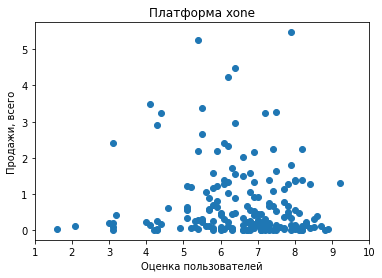

Корреляция между оценкой пользователей и общей продажей:
-0.06892505328279414

Среднее: 6.5
Медиана: 6.8
Дисперсия: 1.9
Стандартное отклонение: 1.4



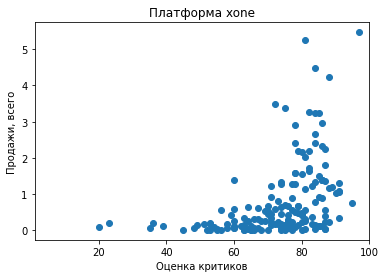

Корреляция между оценкой критиков и общей продажей:
0.4169983280084017

Среднее: 73.3
Медиана: 76.0
Дисперсия: 166.8
Стандартное отклонение: 12.9



In [9]:
sv = games5[games5['critic_score'] < 101]
gip = games5[games5['user_score'] < 11]
xone = sv[sv['platform'] == 'xone']
xoneu = gip[gip['platform'] == 'xone']

xoneu.plot(y = 'prod_sum', x = 'user_score', style = 'o', legend = False, xlim = (1,10))
plt.title('Платформа xone')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой пользователей и общей продажей:')
print(xoneu['user_score'].corr(xoneu['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(xoneu['user_score'].mean()))
print('Медиана: {:.1f}'.format(xoneu['user_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(xoneu['user_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(xoneu['user_score'])))
print('')

xone.plot(y = 'prod_sum', x = 'critic_score', style = 'o', legend = False, xlim = (1,100))
plt.title('Платформа xone')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой критиков и общей продажей:')
print(xone['critic_score'].corr(xone['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(xone['critic_score'].mean()))
print('Медиана: {:.1f}'.format(xone['critic_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(xone['critic_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(xone['critic_score'])))
print('')

Почти отсутствует зависимость между оценкой пользователей и продажами игр на платформе xone. Средняя оценка 6,5 балла.

Есть некоторая зависимость между оценкой критиков и продажами игр на платформе xone. Средняя оценка 73,3 балла.

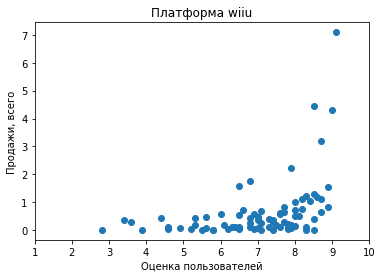

Корреляция между оценкой пользователей и общей продажей:
0.4193304819266187

Среднее: 7.0
Медиана: 7.3
Дисперсия: 2.0
Стандартное отклонение: 1.4



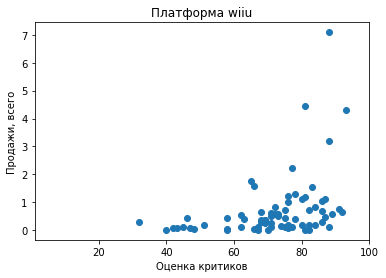

Корреляция между оценкой критиков и общей продажей:
0.3764149065423912

Среднее: 71.6
Медиана: 73.5
Дисперсия: 187.5
Стандартное отклонение: 13.7



In [10]:
wiiu = sv[sv['platform'] == 'wiiu']
wiiuu = gip[gip['platform'] == 'wiiu']
ps4 = sv[sv['platform'] == 'ps4']
ps4u = gip[gip['platform'] == 'ps4']
pc = sv[sv['platform'] == 'pc']
pcu = gip[gip['platform'] == 'pc']
ds3 = sv[sv['platform'] == '3ds']
ds3u = gip[gip['platform'] == '3ds']

wiiuu.plot(y = 'prod_sum', x = 'user_score', style = 'o', legend = False, xlim = (1,10))
plt.title('Платформа wiiu')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой пользователей и общей продажей:')
print(wiiuu['user_score'].corr(wiiuu['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(wiiuu['user_score'].mean()))
print('Медиана: {:.1f}'.format(wiiuu['user_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(wiiuu['user_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(wiiuu['user_score'])))
print('')

wiiu.plot(y = 'prod_sum', x = 'critic_score', style = 'o', legend = False, xlim = (1,100))
plt.title('Платформа wiiu')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой критиков и общей продажей:')
print(wiiu['critic_score'].corr(wiiu['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(wiiu['critic_score'].mean()))
print('Медиана: {:.1f}'.format(wiiu['critic_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(wiiu['critic_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(wiiu['critic_score'])))
print('')

Есть некоторая зависимость между оценкой пользователей и продажами игр на платформе wiiu. Средняя оценка 7,0 балла.

Есть некоторая зависимость между оценкой критиков и продажами игр на платформе wiiu. Средняя оценка 71,6 балла.

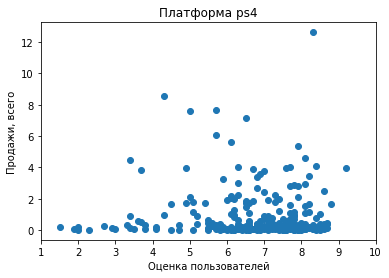

Корреляция между оценкой пользователей и общей продажей:
-0.031957110204556424

Среднее: 6.7
Медиана: 7.0
Дисперсия: 2.1
Стандартное отклонение: 1.5



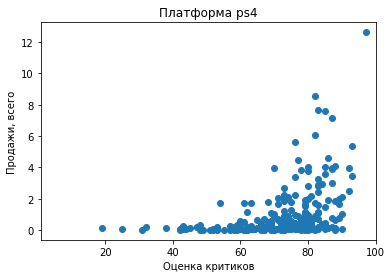

Корреляция между оценкой критиков и общей продажей:
0.40656790206178095

Среднее: 72.1
Медиана: 73.0
Дисперсия: 155.3
Стандартное отклонение: 12.5



In [11]:
ps4u.plot(y = 'prod_sum', x = 'user_score', style = 'o', legend = False, xlim = (1,10))
plt.title('Платформа ps4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой пользователей и общей продажей:')
print(ps4u['user_score'].corr(ps4u['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(ps4u['user_score'].mean()))
print('Медиана: {:.1f}'.format(ps4u['user_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(ps4u['user_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(ps4u['user_score'])))
print('')

ps4.plot(y = 'prod_sum', x = 'critic_score', style = 'o', legend = False, xlim = (1,100))
plt.title('Платформа ps4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой критиков и общей продажей:')
print(ps4['critic_score'].corr(ps4['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(ps4['critic_score'].mean()))
print('Медиана: {:.1f}'.format(ps4['critic_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(ps4['critic_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(ps4['critic_score'])))
print('')

Отсутствует зависимость между оценкой пользователей и продажами игр на платформе ps4. Средняя оценка 6,7 балла.

Есть некоторая зависимость присутствует между оценкой критиков и продажами игр на платформе ps4. Средняя оценка 72,1 балла.

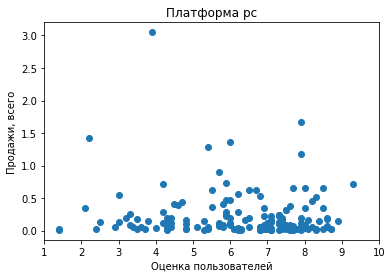

Корреляция между оценкой пользователей и общей продажей:
-0.0899977567844875

Среднее: 6.3
Медиана: 6.8
Дисперсия: 3.0
Стандартное отклонение: 1.7



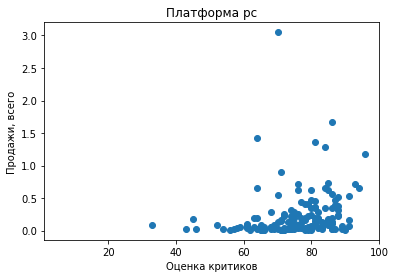

Корреляция между оценкой критиков и общей продажей:
0.19965984836380182

Среднее: 75.5
Медиана: 77.0
Дисперсия: 109.7
Стандартное отклонение: 10.5



In [12]:
pcu.plot(y = 'prod_sum', x = 'user_score', style = 'o', legend = False, xlim = (1,10))
plt.title('Платформа pc')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой пользователей и общей продажей:')
print(pcu['user_score'].corr(pcu['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(pcu['user_score'].mean()))
print('Медиана: {:.1f}'.format(pcu['user_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(pcu['user_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(pcu['user_score'])))
print('')

pc.plot(y = 'prod_sum', x = 'critic_score', style = 'o', legend = False, xlim = (1,100))
plt.title('Платформа pc')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой критиков и общей продажей:')
print(pc['critic_score'].corr(pc['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(pc['critic_score'].mean()))
print('Медиана: {:.1f}'.format(pc['critic_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(pc['critic_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(pc['critic_score'])))
print('')

Отсутствует зависимость между оценкой пользователей и продажами игр на платформе pc. Средняя оценка 6,3 балла.

Слабая зависимость между оценкой критиков и продажами игр на платформе pc. Средняя оценка 75,5 балла.

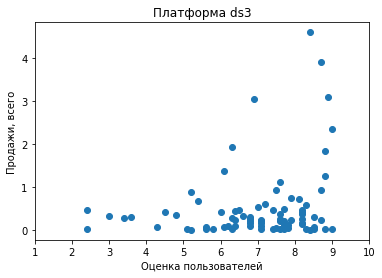

Корреляция между оценкой пользователей и общей продажей:
0.24150411773563016

Среднее: 7.0
Медиана: 7.3
Дисперсия: 2.3
Стандартное отклонение: 1.5



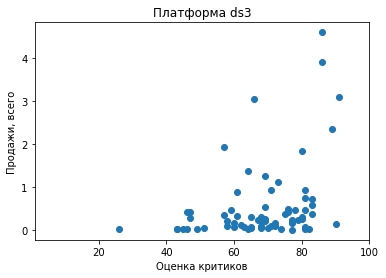

Корреляция между оценкой критиков и общей продажей:
0.3570566142288103

Среднее: 68.3
Медиана: 69.0
Дисперсия: 169.0
Стандартное отклонение: 13.0



In [13]:
ds3u.plot(y = 'prod_sum', x = 'user_score', style = 'o', legend = False, xlim = (1,10))
plt.title('Платформа ds3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой пользователей и общей продажей:')
print(ds3u['user_score'].corr(ds3u['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(ds3u['user_score'].mean()))
print('Медиана: {:.1f}'.format(ds3u['user_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(ds3u['user_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(ds3u['user_score'])))
print('')

ds3.plot(y = 'prod_sum', x = 'critic_score', style = 'o', legend = False, xlim = (1,100))
plt.title('Платформа ds3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, всего')
plt.show()

print('Корреляция между оценкой критиков и общей продажей:')
print(ds3['critic_score'].corr(ds3['prod_sum']))

print('')
print('Среднее: {:.1f}'.format(ds3['critic_score'].mean()))
print('Медиана: {:.1f}'.format(ds3['critic_score'].median()))
print('Дисперсия: {:.1f}'.format(np.var(ds3['critic_score'])))
print('Стандартное отклонение: {:.1f}'.format(np.std(ds3['critic_score'])))
print('')

Есть слабая зависимость между оценкой пользователей и продажами игр на платформе ds3. Средняя оценка 7,0 балла.

Есть некоторая зависимость между оценкой критиков и продажами игр на платформе ds3. Средняя оценка 68,3 балла.

<b>Общий вывод по полученным значениям:</b>

- Лучшая средняя оценка пользователей у платформ ds3 и wiiu по 7,0 балла.

- Лучшая средняя оценка от критиков у платформы pc.

- Существует некоторая зависимость между оценками критиков и продажами, вероятно игроки обращают внимание на данные оценки и принимают решение о покупке, используя эти данные. В то же время оценки игроков зачастую не имеют зависимости с продажами, их мнение бывает очень различным.

In [14]:
high_genre = games5.pivot_table(index = 'genre', values = 'prod_sum', aggfunc = ['sum','count','mean'])
high_genre.columns = ['prod_sum_sum', 'prod_sum_count', 'prod_sum_mean']
high_genre = high_genre.sort_values(by = 'prod_sum_sum', ascending = False)
high_genre

,prod_sum_sum,prod_sum_count,prod_sum_mean
genre,,,
Action,322.50,769,0.419376
Shooter,232.98,187,1.245882
Sports,150.65,214,0.703972
Role-Playing,145.89,292,0.499623
Misc,63.06,156,0.404231
Platform,42.63,74,0.576081
Racing,39.89,85,0.469294
Fighting,35.31,80,0.441375
Adventure,23.64,245,0.096490


В топ-5 самых прибыльных жанров входят: Action, Shooter, Sports, Role-Playing и Misc. Action является ярковыраженным лидером по количесту проданных копий. При этом средняя цена игр жанра Shooter в 3 раза больше, чем у Action.

Самая низкая средняя цена у игр жанра Adventure.

Хуже всего продаются Strategy (видимо люди не любят думать, а также им скучно), Puzzle (интересно лишь детям).

## Портрет пользователя каждого региона

Популярные платформы в Северной Америке, топ 5


,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20


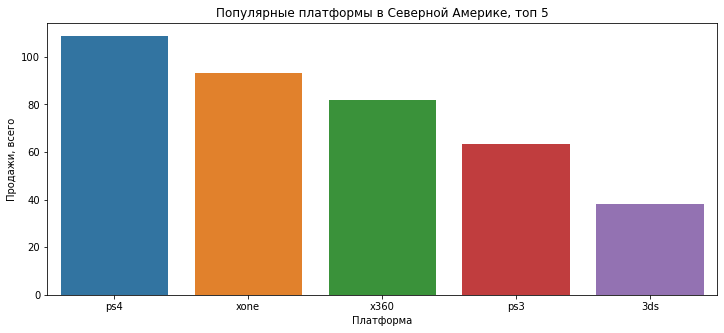

Популярные платформы в Европе, топ 5


,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


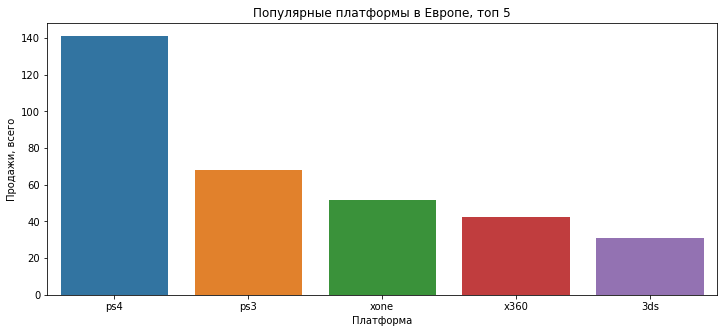

Популярные платформы в Японии, топ 5


,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88


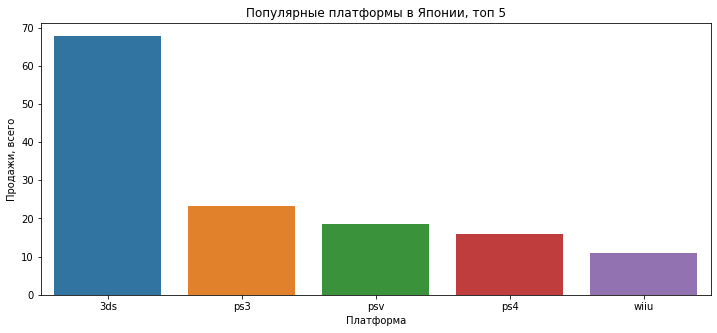

In [15]:
pl5na = games5.pivot_table(index='platform', values='na_sales', aggfunc='sum')
pl5na = pl5na.sort_values(by = 'na_sales', ascending = False).head(5)
print('Популярные платформы в Северной Америке, топ 5')
display(pl5na)

plt.figure(figsize=(12,5))
sns.barplot(x=pl5na.index,y=pl5na['na_sales'])
plt.title('Популярные платформы в Северной Америке, топ 5')
plt.xlabel('Платформа')
plt.ylabel('Продажи, всего')
plt.show()

pl5eu = games5.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
pl5eu = pl5eu.sort_values(by = 'eu_sales', ascending = False).head(5)
print('Популярные платформы в Европе, топ 5')
display(pl5eu)

plt.figure(figsize=(12,5))
sns.barplot(x=pl5eu.index,y=pl5eu['eu_sales'])
plt.title('Популярные платформы в Европе, топ 5')
plt.xlabel('Платформа')
plt.ylabel('Продажи, всего')
plt.show()

pl5jp = games5.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
pl5jp = pl5jp.sort_values(by = 'jp_sales', ascending = False).head(5)
print('Популярные платформы в Японии, топ 5')
display(pl5jp)

plt.figure(figsize=(12,5))
sns.barplot(x=pl5jp.index,y=pl5jp['jp_sales'])
plt.title('Популярные платформы в Японии, топ 5')
plt.xlabel('Платформа')
plt.ylabel('Продажи, всего')
plt.show()

В Северной Америке в лидерах ps4 и xone. Прошлое поколение ps3 и x360 уже позади.

В Европе больше всего играют на ps4 и ps3, продукция Microsoft: xone и x360 отстаёт, японские приставки отстают.

В Японии отдают предпочтение своим японским производителям приставок - xone в топе нет. 3ds лидер.

Популярные жанры в Северной Америке, топ 5


,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


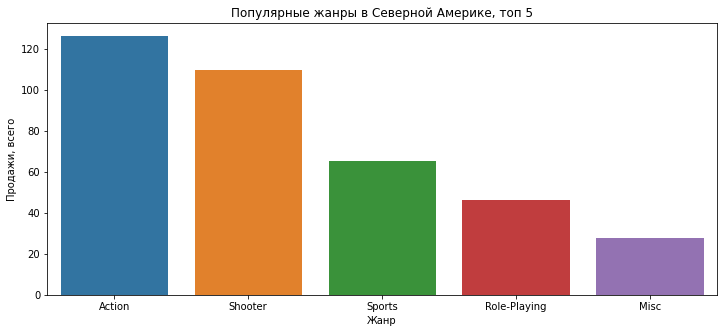

Популярные жанры в Европе, топ 5


,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


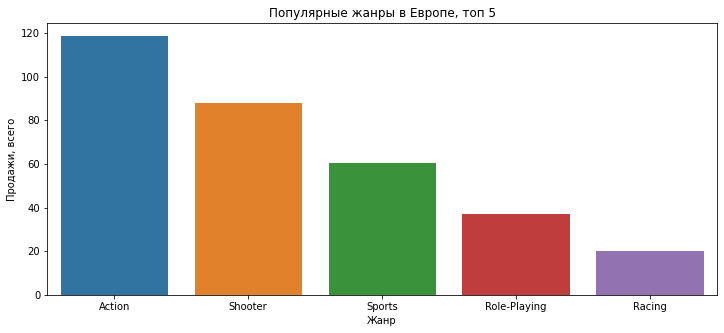

Популярные жанры в Японии, топ 5


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


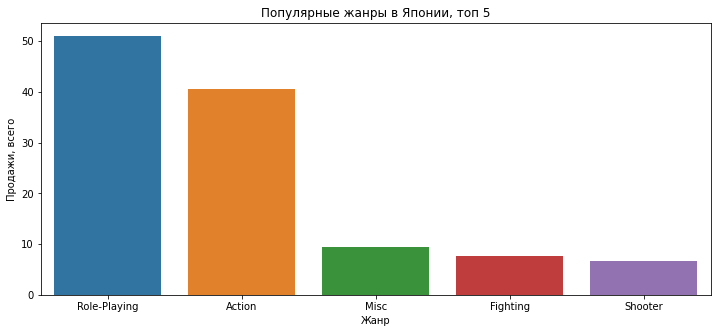

In [16]:
g5na = games5.pivot_table(index='genre', values='na_sales', aggfunc='sum')
g5na = g5na.sort_values(by = 'na_sales', ascending = False).head(5)
print('Популярные жанры в Северной Америке, топ 5')
display(g5na)

plt.figure(figsize=(12,5))
sns.barplot(x=g5na.index,y=g5na['na_sales'])
plt.title('Популярные жанры в Северной Америке, топ 5')
plt.xlabel('Жанр')
plt.ylabel('Продажи, всего')
plt.show()

g5eu = games5.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
g5eu = g5eu.sort_values(by = 'eu_sales', ascending = False).head(5)
print('Популярные жанры в Европе, топ 5')
display(g5eu)

plt.figure(figsize=(12,5))
sns.barplot(x=g5eu.index,y=g5eu['eu_sales'])
plt.title('Популярные жанры в Европе, топ 5')
plt.xlabel('Жанр')
plt.ylabel('Продажи, всего')
plt.show()

g5jp = games5.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
g5jp = g5jp.sort_values(by = 'jp_sales', ascending = False).head(5)
print('Популярные жанры в Японии, топ 5')
display(g5jp)

plt.figure(figsize=(12,5))
sns.barplot(x=g5jp.index,y=g5jp['jp_sales'])
plt.title('Популярные жанры в Японии, топ 5')
plt.xlabel('Жанр')
plt.ylabel('Продажи, всего')
plt.show()

В Японии Shooter в топе на последнем месте, притом что в Европе и Северной Америке этот жанр на 2 месте.

Лидеры из жанров это Action и Shooter, топ-2 в Северной Америке и Европе, в Японии 2 и 5 место.

Продажи игр по рейтингу ESRB в Северной Америке, топ 5


,na_sales
rating,
M,165.29
E,79.05
E10+,54.24
T,49.79


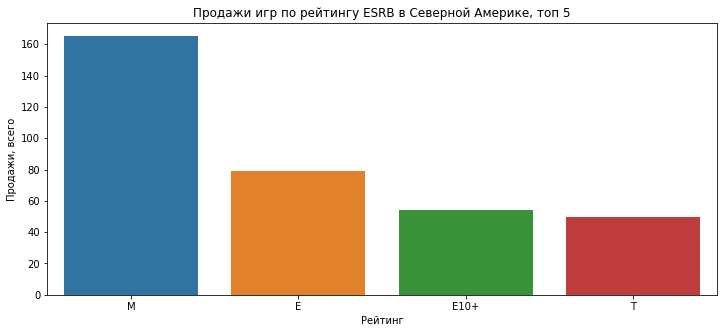

Продажи игр по рейтингу ESRB в Европе, топ 5


,eu_sales
rating,
M,145.80
E,83.36
E10+,42.69
T,41.95


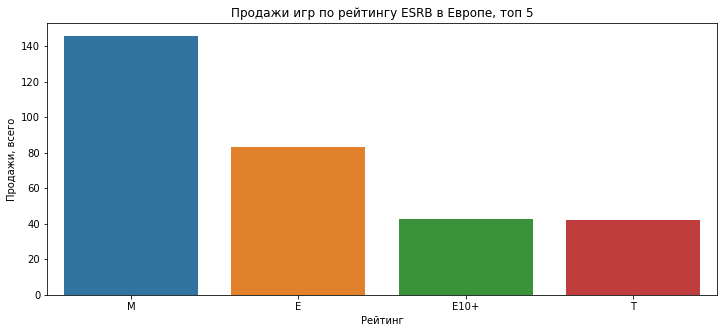

Продажи игр по рейтингу ESRB в Японии, топ 5


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


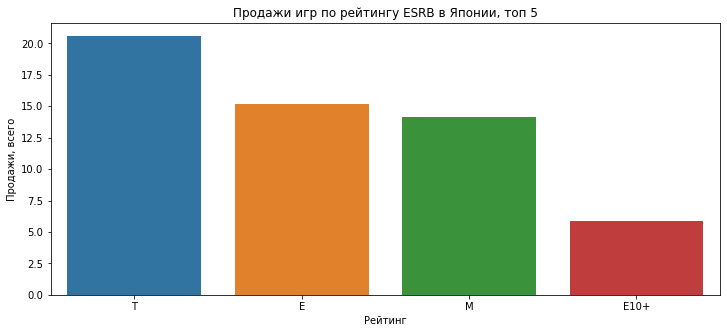

In [17]:
r5na = games5.pivot_table(index='rating', values='na_sales', aggfunc='sum')
r5na = r5na.sort_values(by = 'na_sales', ascending = False).head(5)
print('Продажи игр по рейтингу ESRB в Северной Америке, топ 5')
display(r5na)

plt.figure(figsize=(12,5))
sns.barplot(x=r5na.index,y=r5na['na_sales'])
plt.title('Продажи игр по рейтингу ESRB в Северной Америке, топ 5')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, всего')
plt.show()

r5eu = games5.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
r5eu = r5eu.sort_values(by = 'eu_sales', ascending = False).head(5)
print('Продажи игр по рейтингу ESRB в Европе, топ 5')
display(r5eu)

plt.figure(figsize=(12,5))
sns.barplot(x=r5eu.index,y=r5eu['eu_sales'])
plt.title('Продажи игр по рейтингу ESRB в Европе, топ 5')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, всего')
plt.show()

r5jp = games5.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
r5jp = r5jp.sort_values(by = 'jp_sales', ascending = False).head(5)
print('Продажи игр по рейтингу ESRB в Японии, топ 5')
display(r5jp)

plt.figure(figsize=(12,5))
sns.barplot(x=r5jp.index,y=r5jp['jp_sales'])
plt.title('Продажи игр по рейтингу ESRB в Японии, топ 5')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, всего')
plt.show()

Топ-4 по рейтингам практически одинаков по Европе и Северной Америке. Лучше всего продаются игры с рейтингом: M, E, E10+, T.

В Японии ситуация иная: T является лидером, затем идёт E, M лишь на 3 месте и замыкает список E10+. Возможно, в Японии существует цензура, которая не пропускает все проекты с рейтингом M.

## Проверка гипотез

Данные недостаточно нормально распределены, поэтому применим тест Манна-Уитни.

<b>H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>

<b>H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются</b>

6.2803797468354405
6.52142857142857


C:\Users\Ant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


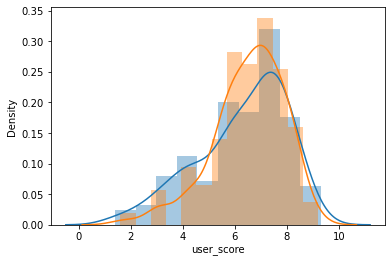

p-значение:  0.5184754169156851
Не получилось отвергнуть нулевую гипотезу


In [18]:
pc = gip[gip['platform']=='pc']['user_score']
xo = gip[gip['platform']=='xone']['user_score']

print(pc.mean())
print(xo.mean())

sns.distplot(pc)
sns.distplot(xo)
plt.show()

alpha=0.05

results = st.mannwhitneyu(pc, xo, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Данные недостаточно нормально распределены, поэтому применим тест Манна-Уитни и для второй гипотезы.

<b>H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые</b>

<b>H1: Средние пользовательские рейтинги жанров Action и Sports разные</b>

6.837500000000005
5.238124999999999


C:\Users\Ant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


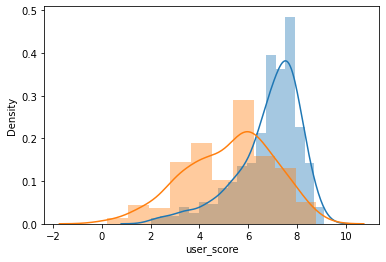

p-значение:  1.4675271698449454e-23
Отвергаем нулевую гипотезу


In [19]:
act = gip[gip['genre']=='Action']['user_score']
spo = gip[gip['genre']=='Sports']['user_score']

print(act.mean())
print(spo.mean())

sns.distplot(act)
sns.distplot(spo)
plt.show()

results = st.mannwhitneyu(act, spo, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

В ходе работы были обработаны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности.

По итогам работы выяснилось много деталей из этих данных.

C 2000 года на рынке стало появляться много игр. Произошёл резкий рост. При этом после 2010 года начался спад, если такими темпами он продолжится, то количество выпускаемых игр в год упадёт до уровня 2000 года.

Топ-5 продаж по платформам составляют: xone, wiiu, ps4, pc, 3ds. Жизненный цикл платформ из топ-5 в среднем составляет 10 лет.
В работе проведена оценка данных от 2013 года.

Лучшая средняя оценка пользователей у платформ ds3 и wiiu по 7,0 балла. Лучшая средняя оценка от критиков у платформы pc.

Существует некоторая зависимость между оценками критиков и продажами, вероятно игроки обращают внимание на данные оценки и принимают решение о покупке, используя эти данные. В то же время оценки игроков зачастую не имеют зависимости с продажами, их мнение бывает очень различным. Наблюдается тренд, что чем выше оценка критиков, тем лучше продаётся игра.

В топ-5 самых прибыльных жанров входят: Action, Shooter, Sports, Role-Playing и Misc. Action является ярковыраженным лидером по количесту проданных копий. При этом средняя цена игр жанра Shooter в 3 раза больше, чем у Action. Самая низкая средняя цена у игр жанра Adventure. Хуже всего продаются Strategy (видимо люди не любят думать, а также им скучно), Puzzle (интересно лишь детям).

Топ-4 по рейтингам практически одинаков по Европе и Северной Америке. Лучше всего продаются игры с рейтингом: M, E, E10+, T. В Японии ситуация иная: T является лидером, затем идёт E, M лишь на 3 месте и замыкает список E10+. Возможно в Японии существует цензура, которая не пропускает все проекты с рейтингом M.

Были проверены гипотезы:

1)	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждена

2)	Средние пользовательские рейтинги жанров Action и Sports одинаковые - отвергнута

Предложения:

1. Следует акцентировать внимание на платформе PlayStation 4 (ps4), она находится на пике жизненного цикла.
2. Самый успешный жанр по количеству копий Action, по средней цене копии - Shooter.
3. Рейтинг M в лидерах.